In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
!mpirun -n 2 ./mpi_pingpong --file time1.csv

parameter           | value
--------------------+---------------------------------------- pingpong
file                | time1.csv
type                | double
test                | ping_pong
min_msgsize         | 1
max_msgsize         | 16777216
linear              | no
repeat              | 10
step                | 1
factor              | 2



In [3]:
df = pd.read_csv("time1.csv", delimiter=" ")
df.head()

,#cnt,bytes,time_avg,time_min,bandwidth
0,1,8,3.576280e-07,3.576280e-07,22369600.0
1,2,16,5.006790e-07,5.006790e-07,31956600.0
2,4,32,1.430510e-07,1.430510e-07,223696000.0
3,8,64,2.026560e-07,2.026560e-07,315806000.0
4,16,128,1.549720e-07,1.549720e-07,825955000.0


In [4]:
def plot_two(df, x, y, **kwargs):
    fig, ax = plt.subplots(1, 2)
    df.plot(x, y, ax=ax[0], **kwargs)
    df.plot(x, y, ax=ax[1], **kwargs)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")

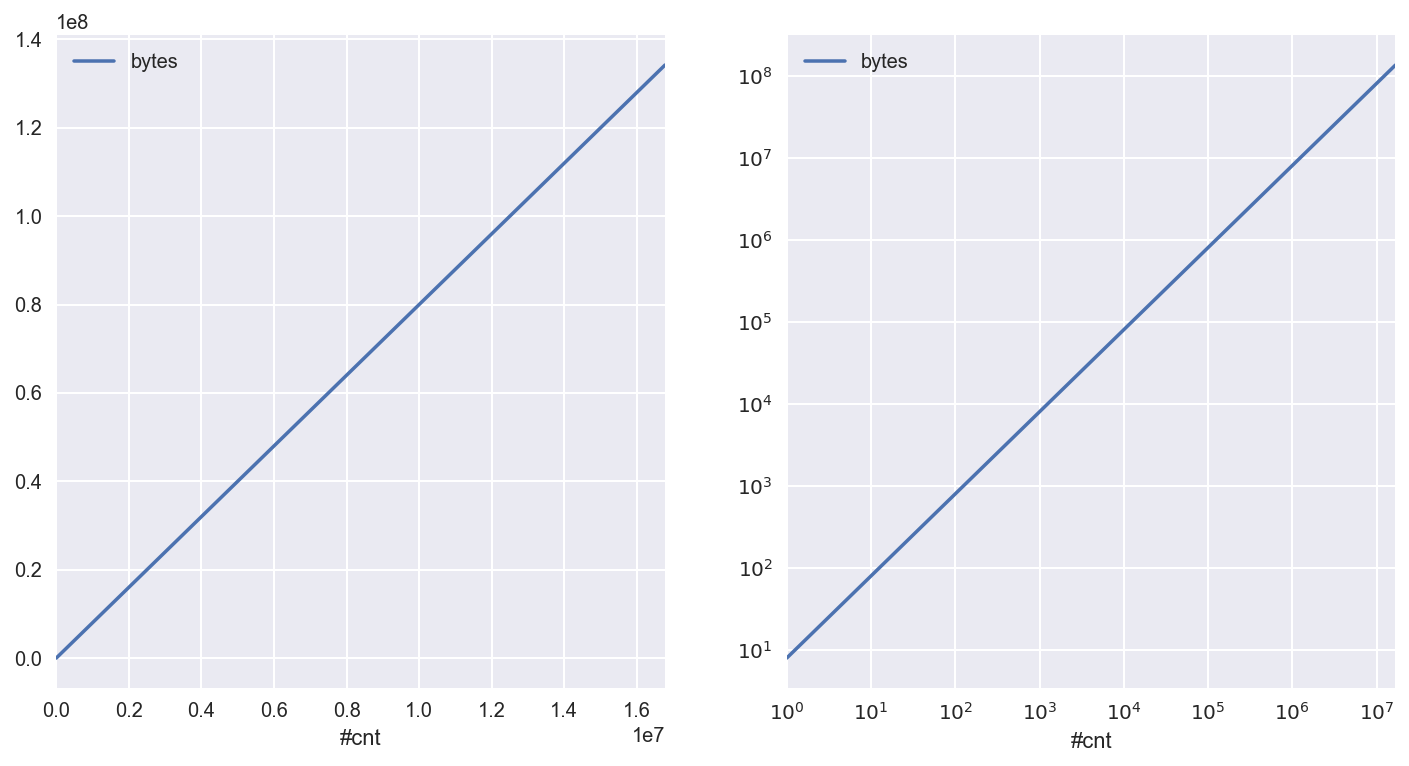

In [5]:
plot_two(df, "#cnt", "bytes")

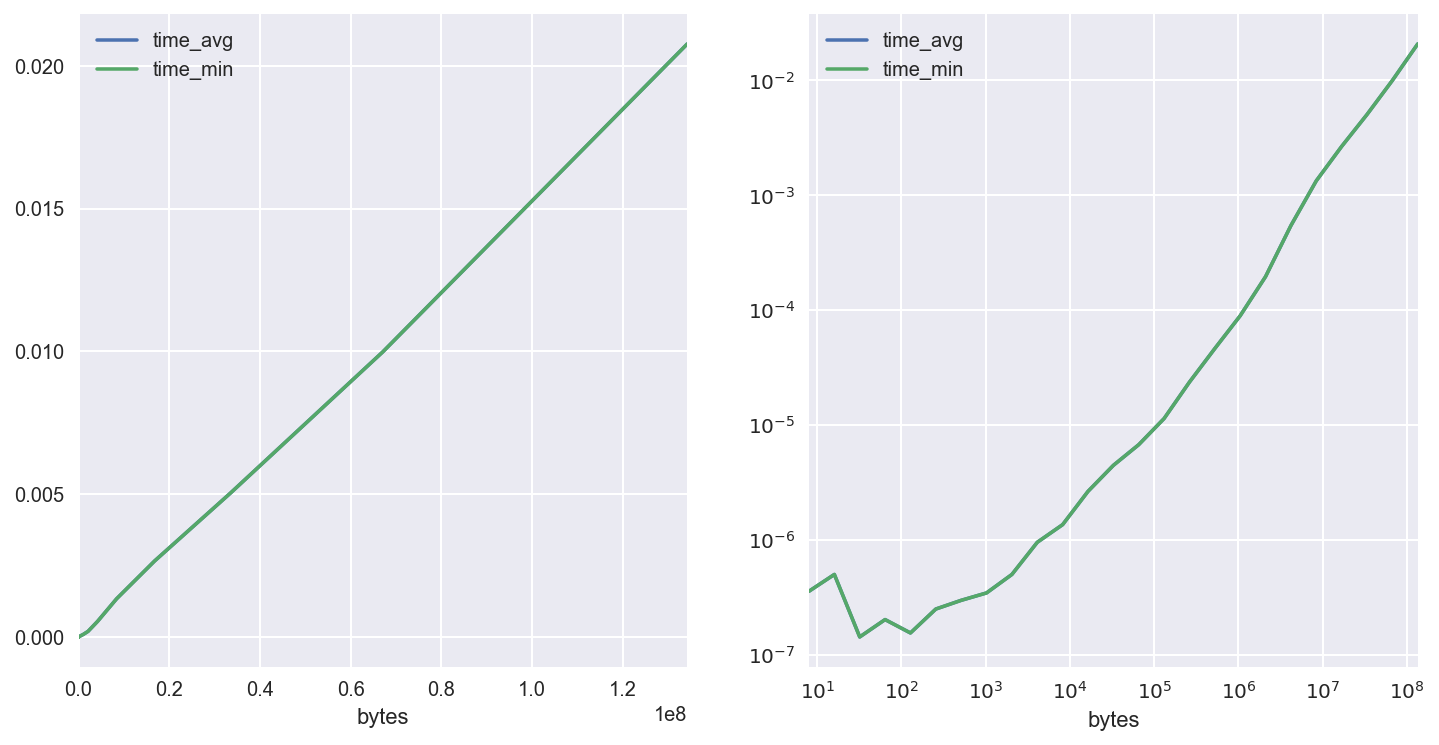

In [6]:
plot_two(df, "bytes", ["time_avg", "time_min"])

parameter           | value
--------------------+---------------------------------------- pingpong
file                | time2.csv
type                | double
test                | ping_pong
min_msgsize         | 1
max_msgsize         | 1000
linear              | yes
repeat              | 10
step                | 1
factor              | 2



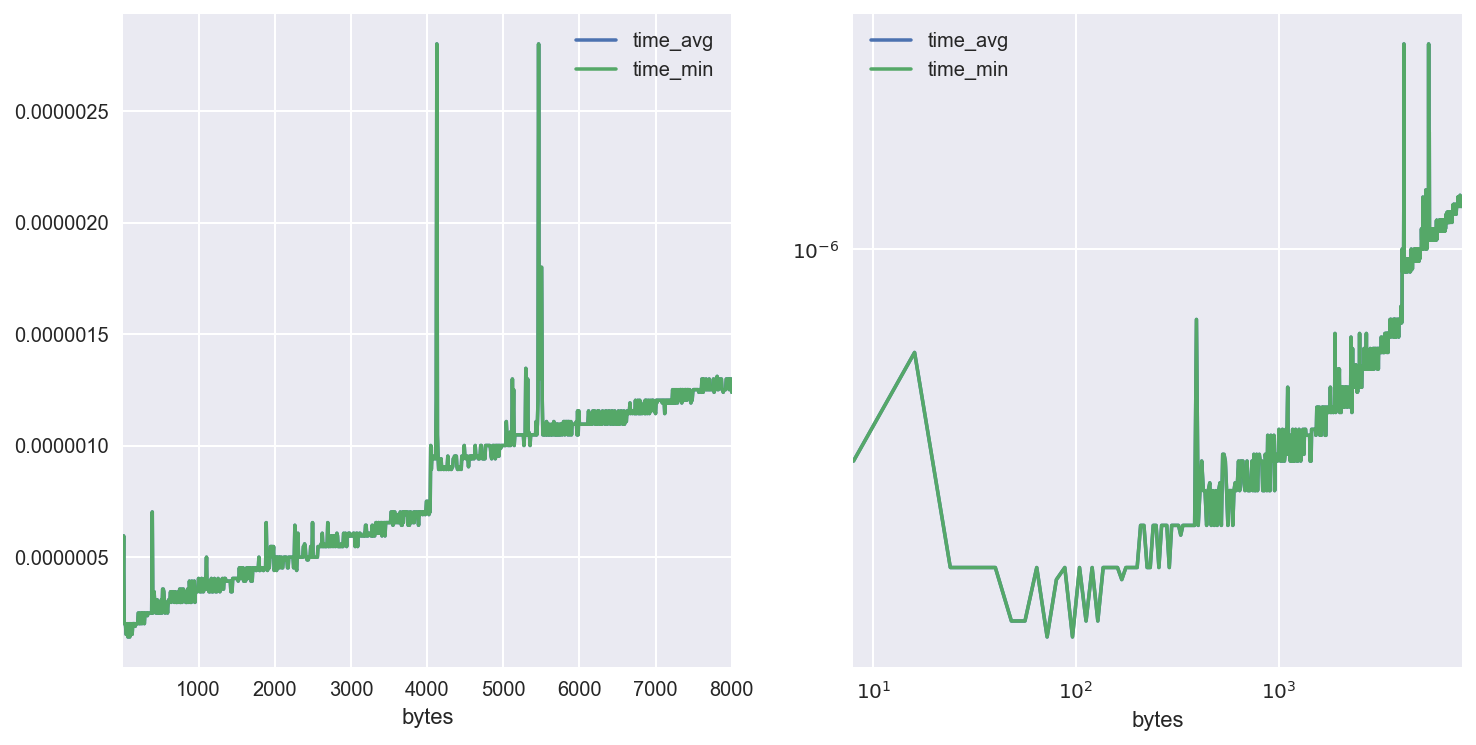

In [7]:
!mpirun -n 2 ./mpi_pingpong --file time2.csv --linear --max_msgsize 1000
df2 = pd.read_csv("time2.csv", delimiter=" ")
plot_two(df2, "bytes", ["time_avg", "time_min"])

parameter           | value
--------------------+---------------------------------------- pingpong
file                | time3.csv
type                | double
test                | ping_pong
min_msgsize         | 1
max_msgsize         | 1000
linear              | yes
repeat              | 1000
step                | 1
factor              | 2



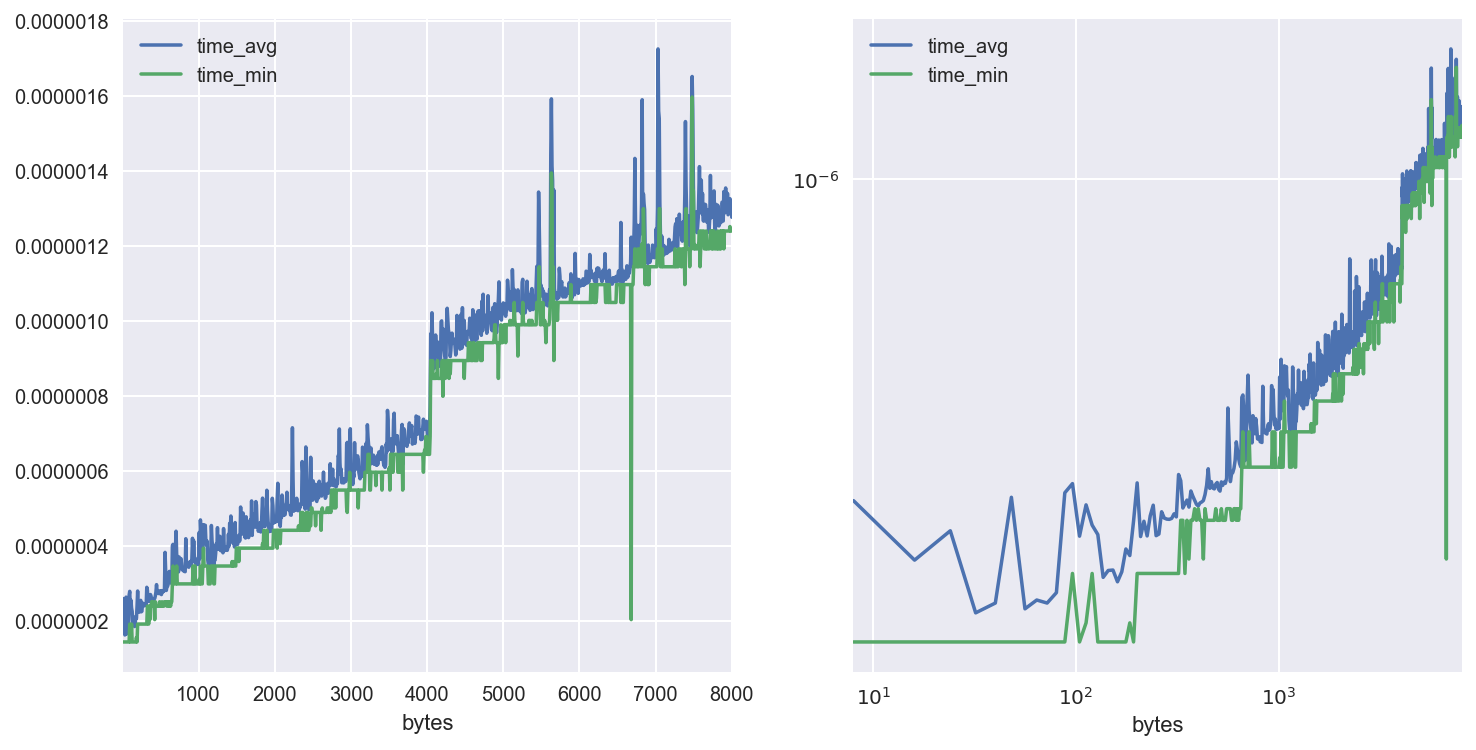

In [8]:
!mpirun -n 2 ./mpi_pingpong --file time3.csv --linear --max_msgsize 1000 --repeat 1000
df3 = pd.read_csv("time3.csv", delimiter=" ")
plot_two(df3, "bytes", ["time_avg", "time_min"])

parameter           | value
--------------------+---------------------------------------- pingpong
file                | time3.csv
type                | double
test                | ping_pong
min_msgsize         | 1
max_msgsize         | 5000
linear              | yes
repeat              | 1000
step                | 5
factor              | 2



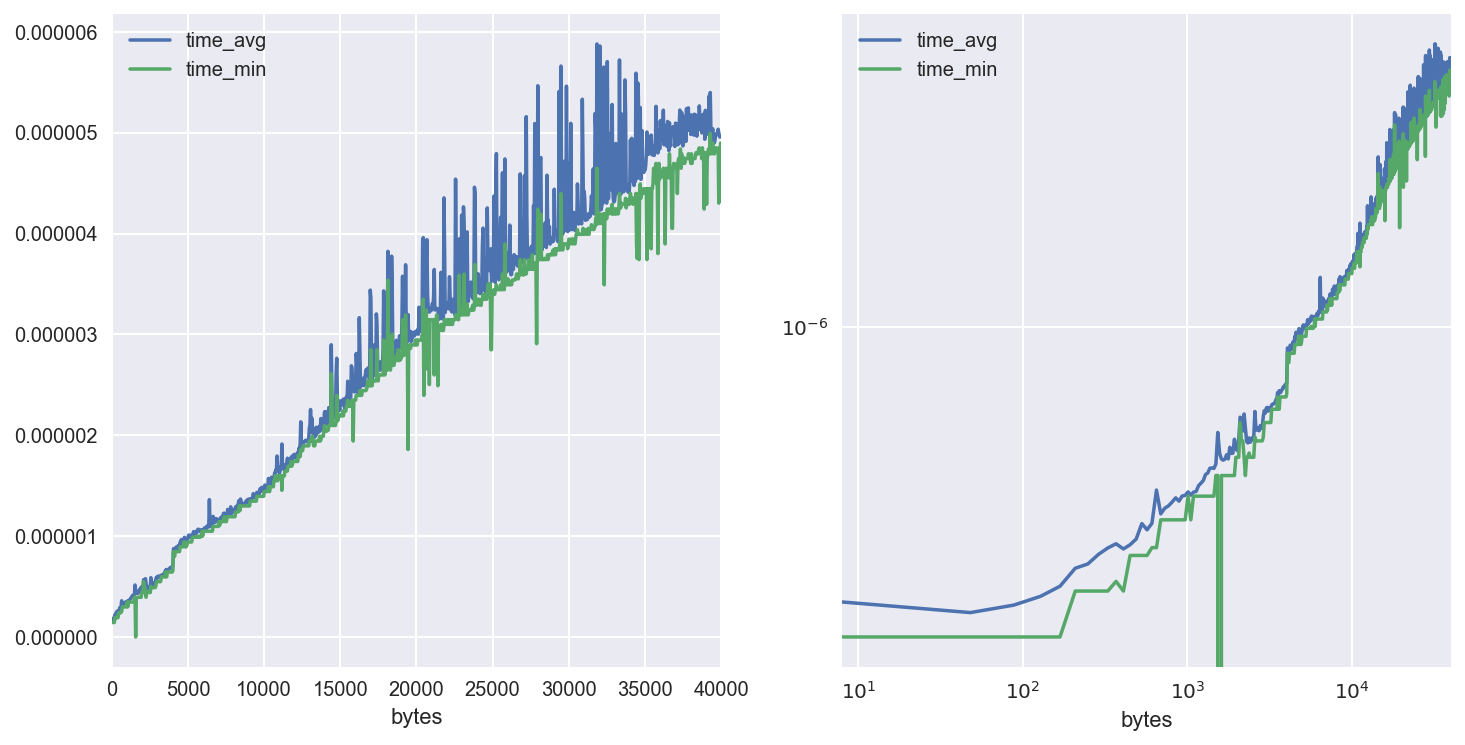

In [9]:
!mpirun -n 2 ./mpi_pingpong --file time3.csv --linear --max_msgsize 5000 --step 5 --repeat 1000
df3 = pd.read_csv("time3.csv", delimiter=" ")
plot_two(df3, "bytes", ["time_avg", "time_min"])

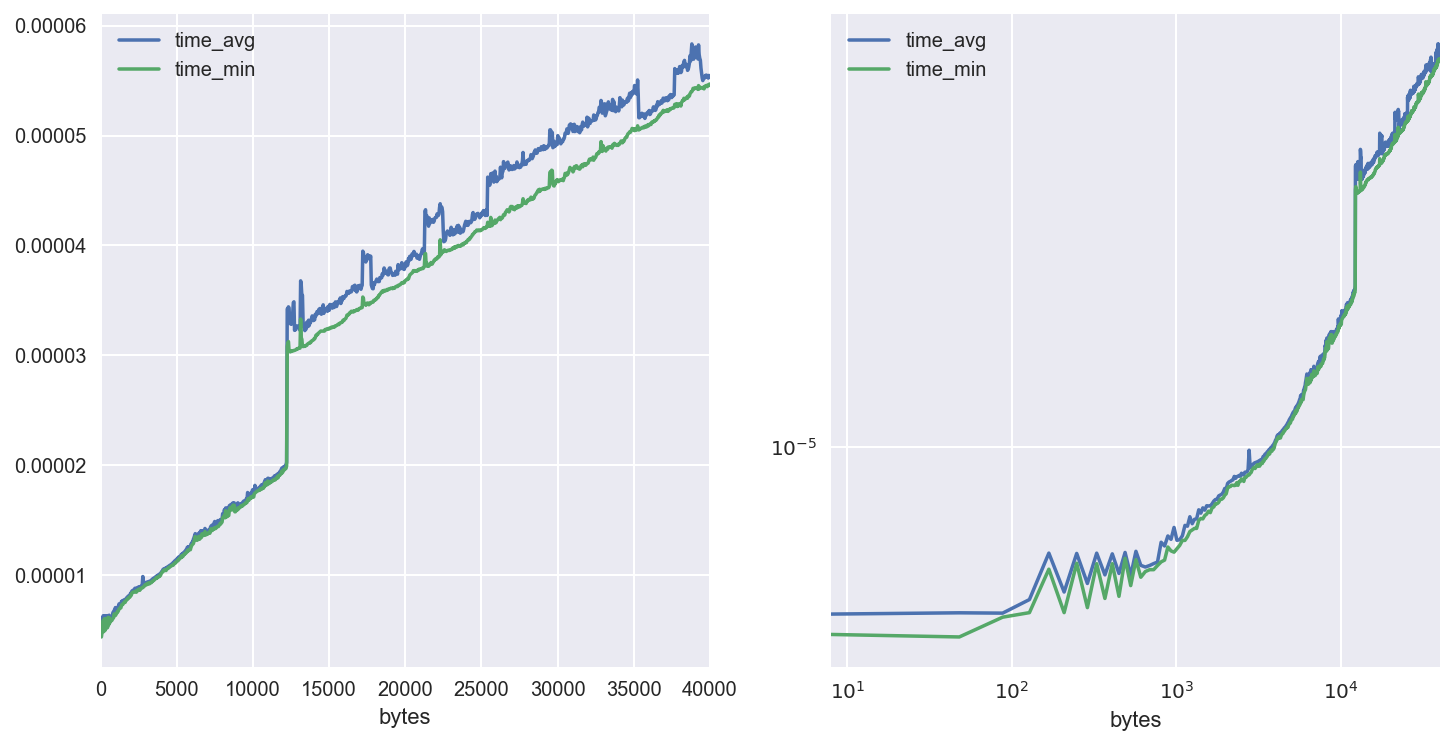

In [10]:
# on fishercat
#!mpirun -n 2 ./mpi_pingpong --file time3.csv --linear --max_msgsize 5000 --step 5 --repeat 1000
df_fc = pd.read_csv("time-fc.csv", delimiter=" ")
plot_two(df_fc, "bytes", ["time_avg", "time_min"])

# Let's briefly look at bandwidth

In [11]:
# on the macbook, using shared memory
df3.tail()

,#cnt,bytes,time_avg,time_min,bandwidth
995,4976,39808,0.000005,0.000005,8.224970e+09
996,4981,39848,0.000005,0.000004,9.259540e+09
997,4986,39888,0.000005,0.000005,8.221250e+09
998,4991,39928,0.000005,0.000005,8.331850e+09
999,4996,39968,0.000005,0.000005,8.157560e+09


In [12]:
# on fishercat, using Infiniband
df_fc.tail()

,#cnt,bytes,time_avg,time_min,bandwidth
995,4976,39808,0.000055,0.000054,731028000.0
996,4981,39848,0.000055,0.000055,729846000.0
997,4986,39888,0.000055,0.000055,730578000.0
998,4991,39928,0.000055,0.000055,731950000.0
999,4996,39968,0.000055,0.000055,730767000.0
